## Exploratory Data Analysis (EDA)

### Iris Flower dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This dataset includes:

Numerical data: sepal_length, sepal_width, petal_length, and petal_width.
Categorical data: species.
Note: for sepal_length, sepal_width, petal_length, and petal_width, unit of measurement is centimeters.


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### 2-D Scatter Plot

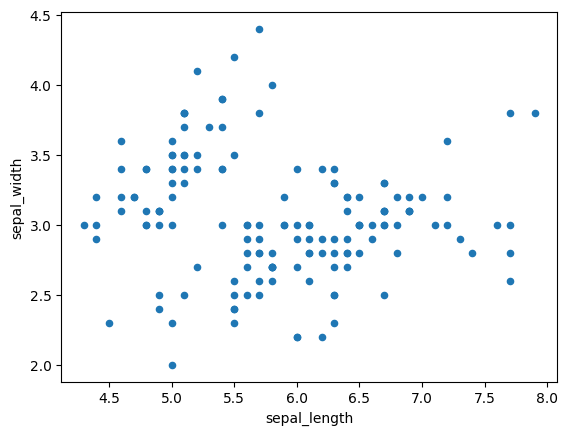

In [11]:
df.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

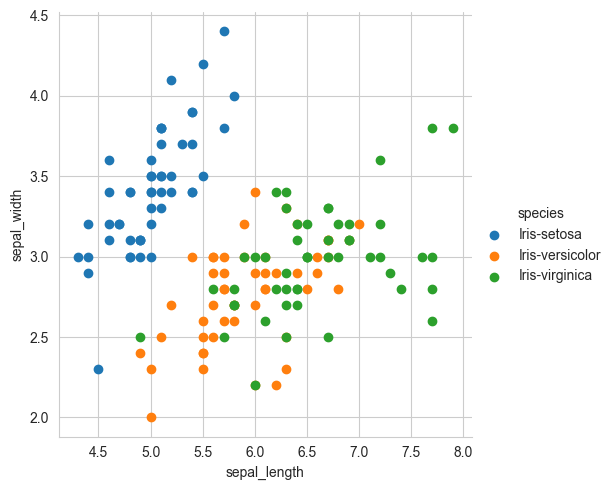

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height=5) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend();
plt.show();

### Observation(s)

1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

### Scatter plot

### Pair-plot

c:\Data Science Projects\HexSoftwares_Exploratory_Data_Analysis_Project\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


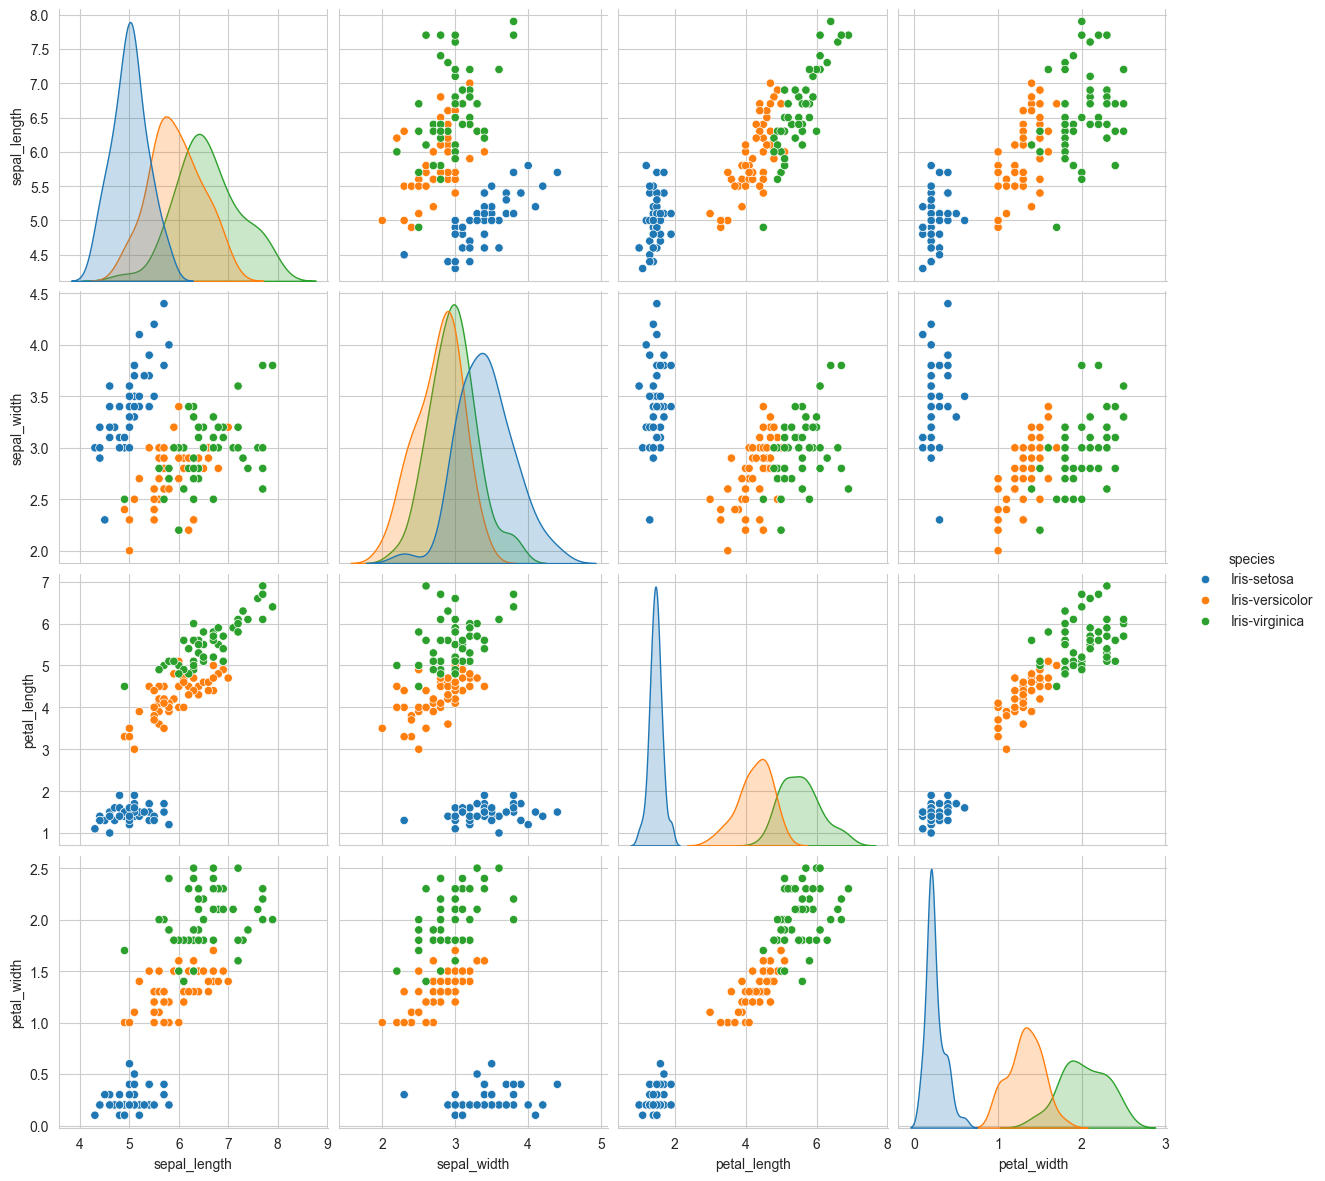

In [19]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="species", size=3);
plt.show()


### Observations

The scatter plots demonstrate clear distinctions between the species based on these four measurements, especially between setosa and the other two species. The setosa flowers tend to be smaller in petal length and width but have wider sepals. Versicolor and virginica have more overlap in their sepal dimensions but can be distinguished based on petal length and width, with virginica generally having larger petals. The scatter plots also suggest strong correlations between petal length and width for all species, and between sepal length and petal size for versicolor and virginica. These correlations are less pronounced for setosa, likely due to the limited range of petal sizes within that species.

1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### Histogram

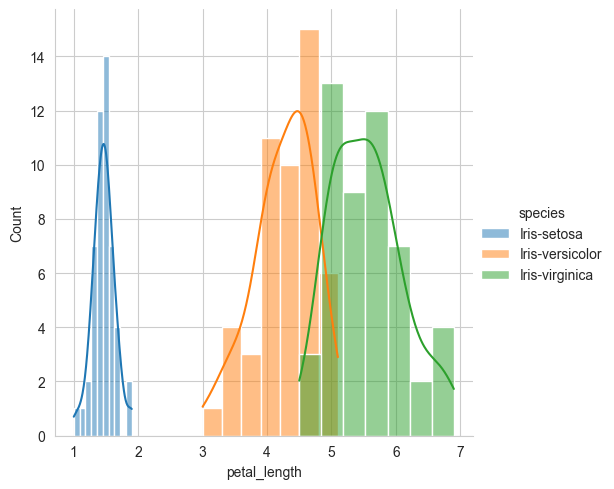

In [46]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.histplot, "petal_length", kde=True) \
   .add_legend();
plt.show();


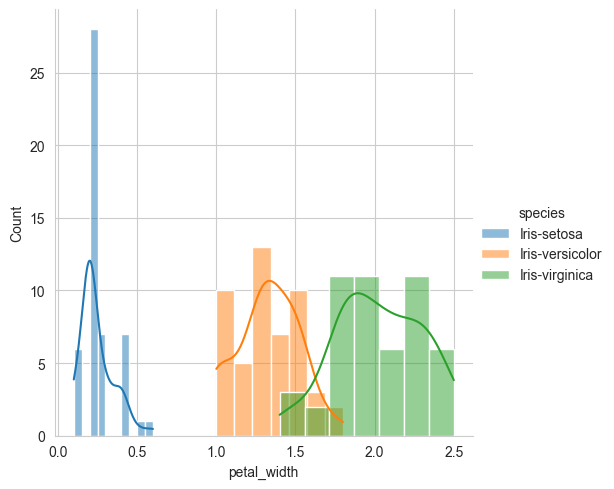

In [45]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.histplot, "petal_width", kde=True) \
   .add_legend();
plt.show();

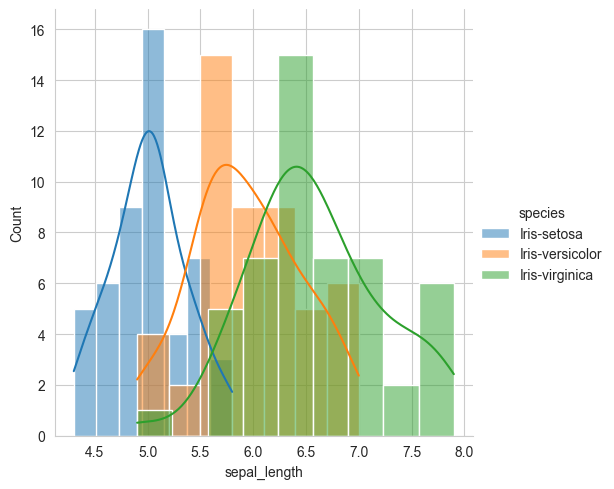

In [49]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.histplot, "sepal_length", kde=True) \
   .add_legend();
plt.show();

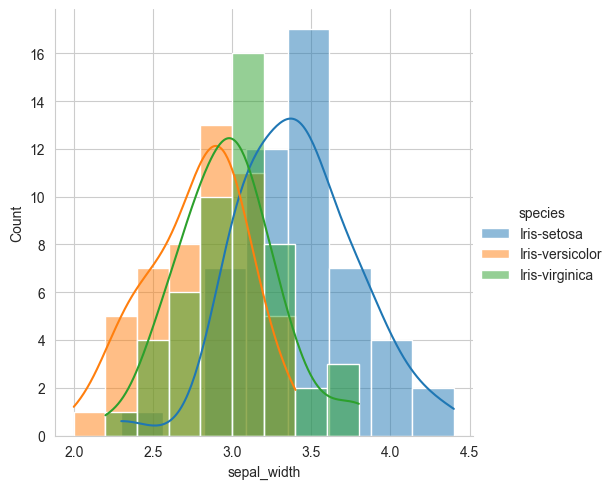

In [50]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.histplot, "sepal_width", kde=True) \
   .add_legend();
plt.show();

Split the dataset in 2 variables - the numerical attribute(s) and the categorical attribute(s), because the following calculation and explorations may vary depending on the data type itself.

In [5]:
numerical_df = df.drop(columns=['species'])
# The only categorical data present in the data set, so the data type resulting from this operator is a Series object.
species_series = df['species']


In [65]:
species_series.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Check for inconsistencies in the dataset specifically the numeric attributes, all of the attributes present represents a dimension, so it cannot be negative.

Inconsistencies may occur due to data corruption, human error during data entry or processing, etc...

In [66]:
for attr in numerical_df.columns:
  inconsistent_fields = numerical_df[attr] < 0

  if inconsistent_fields.any():
    print(f'Found inconsistencies for attribute {attr}')
    print(inconsistent_fields)
  else:
    print(f'For attribute {attr}, no inconsistencies found.')

For attribute sepal_length, no inconsistencies found.
For attribute sepal_width, no inconsistencies found.
For attribute petal_length, no inconsistencies found.
For attribute petal_width, no inconsistencies found.


## Display statistical properties for both numercial and categorical data

In [67]:
numerical_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
numerical_df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [ ]:
#Variance
numerical_df.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [9]:
#Covariance
numerical_df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [10]:
#Range calculation
numerical_df.apply(lambda feat: feat.max() - feat.min())

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [11]:
#Calculate skewness of the numerical data
numerical_df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [12]:
#Calculate kurtois of the numerical data
numerical_df.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

In [13]:
#Calculate the correlation between the numerical features
numerical_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


For categorial data
#### Examine each category present in the dataset and its frequency

In [14]:
species_series.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

For both data types, mode can be calculated using the df.mode() method

In [15]:
df.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


A bar plot for species and their count to represent the distribution of the data based on the category.

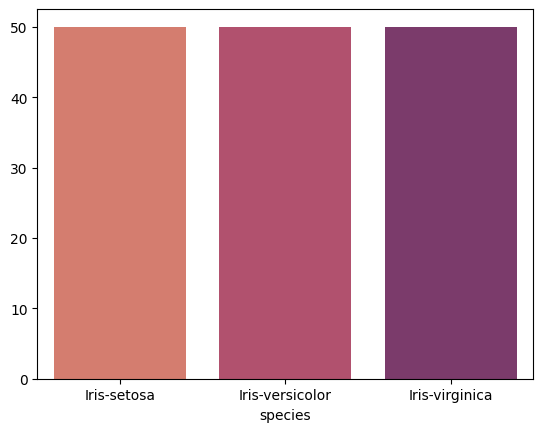

In [16]:
species_count = species_series.value_counts()

sns.barplot(x=species_count.index, y=species_count.values, hue=species_count.index, palette='flare')

plt.show()

 Box plot for visualing statistical properties for numerical attributes (lengths and widths) and showing outliers (if any) for all species combined.

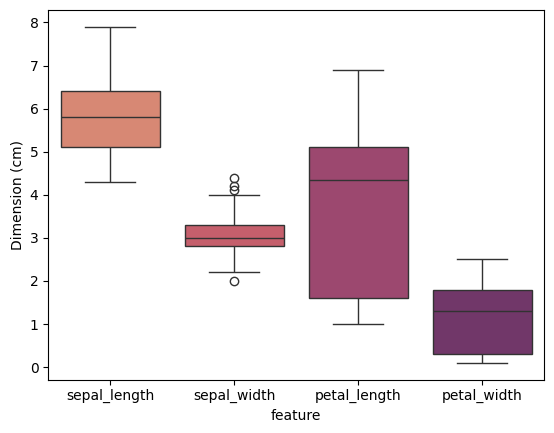

In [18]:
plt.xlabel('feature')
plt.ylabel('Dimension (cm)')
sns.boxplot(data=numerical_df, palette='flare')
plt.show()

Boxplots for each numerical feature separately by species (to provide a cleaner look based on the feature spearated by species)

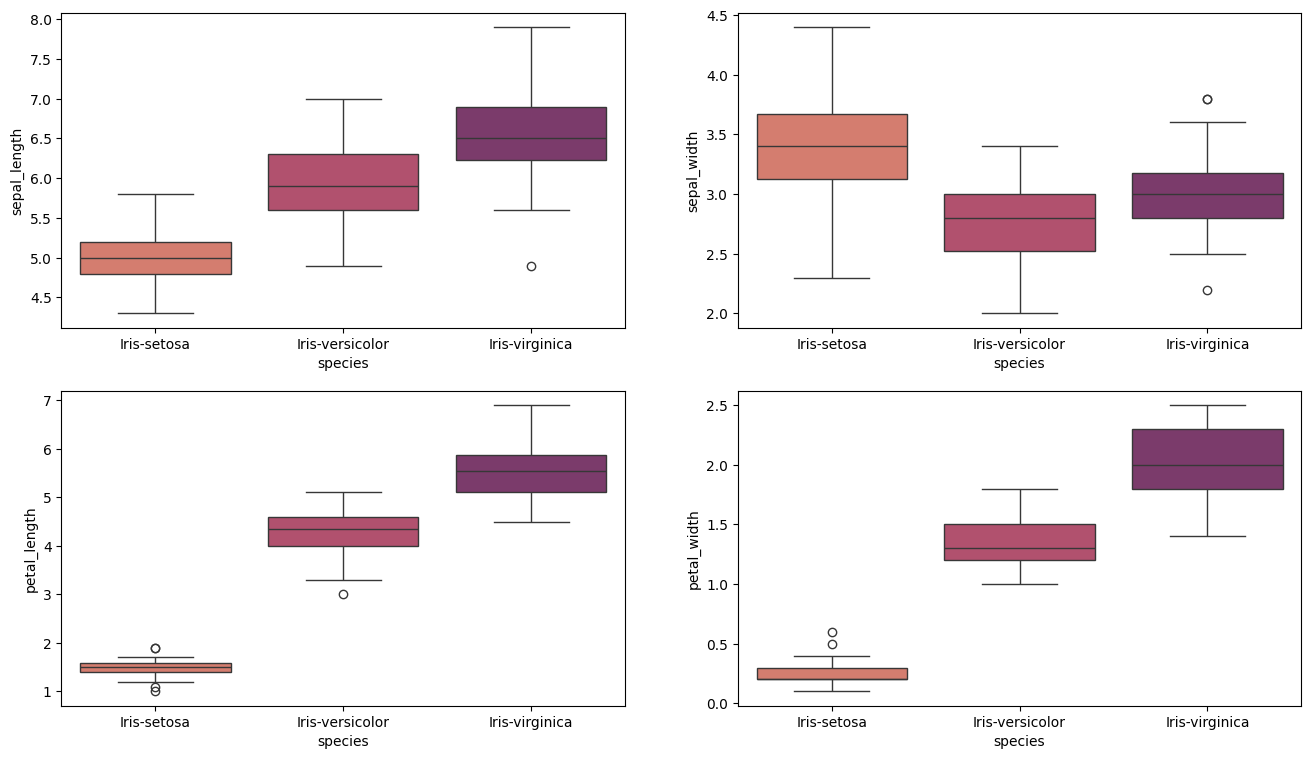

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

for (ax, attr) in zip(axes.flatten(), numerical_df.columns):
  sns.boxplot(data=df, x='species', y=attr, orient='v', ax=ax, hue='species', palette='flare')

plt.show()

The boxplots reveal that Setosa species tend to have shorter and wider sepals and very short and narrow petals. Versicolor species are intermediate in most characteristics. Virginica species have the longest and widest petals, and sepal length is also the longest, but sepal width is comparable to Versicolor.



### Violin plots

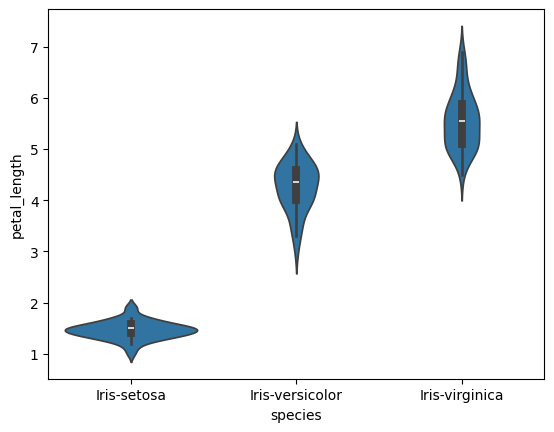

In [25]:
sns.violinplot(x="species", y="petal_length", data=df)
plt.show()

Heatmap for represnting correlation between features(attributes).

<Axes: >

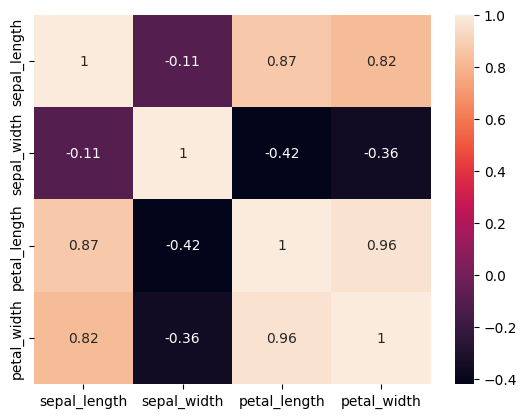

In [20]:
sns.heatmap(data=numerical_df.corr(), annot=True)

Petal Length and Petal Width (0.96): There's a very strong positive correlation between petal_length and petal_width. This makes intuitive sense; longer petals tend to be wider. 

Sepal Length and Petal Length (0.87): There's a strong positive correlation between sepal_length and petal_length. This suggests that flowers with longer sepals also tend to have longer petals.

Sepal Length and Petal Width (0.82): There's a strong positive correlation between sepal_length and petal_width.

Sepal Width and Petal Length (-0.42): There's a moderate negative correlation between sepal_width and petal_length. This indicates that as the sepal_width increases, the petal_length tends to decrease, and vice-versa.

Sepal Width and Petal Width (-0.36): There's a moderate negative correlation between sepal_width and petal_width. Similar to the previous point, as sepal_width increases, petal_width tends to decrease.

Sepal Length and Sepal Width (-0.11): There's a very weak negative correlation between sepal_length and sepal_width. This suggests that these two variables are not strongly related.

Diagonal values (1): The diagonal of the matrix shows the correlation of each variable with itself, which is always a perfect positive correlation of 1.

## Multivariate probability density, contour plot.

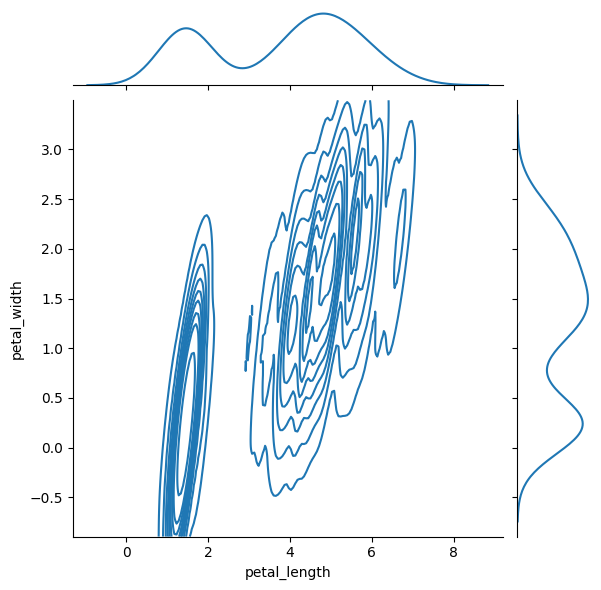

In [34]:
sns.jointplot(x="petal_length", y="petal_width", data=numerical_df, kind="kde")
plt.show()

### Kolmogorov-Smirnov (KS) Tests

Two main types of tests:
A two-sample test comparing two datasets and a one-sample goodness-of-fit test comparing a dataset to a theoretical normal distribution.

In [43]:
iris_setosa = df.loc[df["species"] == "setosa"];
iris_virginica = df.loc[df["species"] == "virginica"];
iris_versicolor = df.loc[df["species"] == "versicolor"];

In [37]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]

Two-Sample KS Test: stats.ks_2samp.
This part attempts to compare the sepal width distributions of the Iris virginica and Iris versicolor species.

In [39]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)

C:\Users\KGOMOTSO MONGALE\AppData\Local\Temp\ipykernel_14108\1766064382.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)


KstestResult(statistic=np.float64(nan), pvalue=np.float64(nan), statistic_location=np.float64(nan), statistic_sign=np.float64(nan))

One-Sample KS Test: stats.kstest.
This part tests if a randomly generated sample of data comes from a normal distribution.

In [40]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')

KstestResult(statistic=np.float64(0.23745108816356975), pvalue=np.float64(0.5489010853103056), statistic_location=np.float64(0.35165391826835807), statistic_sign=np.int8(-1))

A sample of 10 data points drawn from a normal distribution with a mean of 0.2. The test compares this sample to a standard normal distribution (mean=0, std=1). The p-value of 0.548 is high, indicating that the small sample is statistically similar enough to a normal distribution.

In [41]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=np.float64(0.09179436210754977), pvalue=np.float64(0.3471741164967431), statistic_location=np.float64(0.20648603035854454), statistic_sign=np.int8(-1))

With a larger sample of 100 points, the p-value is still high (0.347), confirming that the sample's distribution is not statistically different from a normal distribution.

In [42]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')

KstestResult(statistic=np.float64(0.08613951174404222), pvalue=np.float64(6.635283122029317e-07), statistic_location=np.float64(-0.3714813779787908), statistic_sign=np.int8(-1))

With a much larger sample (1000 points), the test is more sensitive to the slight difference between the sample's true mean (0.2) and the mean of the theoretical distribution (0.0). The p-value is extremely low, which is less than the typical significance level of 0.05. This result leads you to reject the null hypothesis that the sample comes from a standard normal distribution. This makes sense, as the sample was actually drawn from a normal distribution with a mean of 0.2, not 0.0. 